In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("Coffe_sales.csv")

In [ ]:
def determine_milk_ratio(drink):
    '''
    Helper function to define milk ratios and return corresponding milk ratios.

    Params:
    -------
    drink : str
        Type of drink
    
    Returns:
    tuple
        Tuple corresponding to milk to coffee ratio
    '''
    milk_map = {
        "Latte": (0.7, 0.3),
        "Cappuccino": (0.67, 0.33),
        "Flat White": (0.75, 0.25),
        "Hot Chocolate": (1.0, 0.0),
        "Cocoa": (1.0, 0.0),
        "Americano": (0.0, 1.0),
        "Americano with Milk": (0.2, 0.8),
        "Cortado": (0.5, 0.5)
    }

    milk, coffee = milk_map.get(drink, (0.0, 1.0))
    return milk / (milk + coffee)


In [17]:
def milk_ratio_scatter(df):
    '''
    Plot a scatterplot of avg milk ratio by the hour of day.

    Params:
    -------
    df : pd.DataFrame
        Dataframe of values
    
    Returns:
    --------
    None
    
    '''
    milk_ratio_by_hour = df.groupby("hour_of_day")["milk_ratio"]
    avg_milk_ratio_per_hour = milk_ratio_by_hour.mean()

    plt.figure()
    sns.lineplot(avg_milk_ratio_per_hour, marker="o", color="red")
    plt.title("Average Milk Ratio vs Hour in Day")
    plt.xlabel("Hour in Day")
    plt.ylabel("Average Milk Ratio")
    plt.xticks(range(0,24))
    plt.show()

def milk_ratio_heatmap(df):
    '''
    Plot a heatmap of avg milk ratio by the hour of day.

    Params:
    -------
    df : pd.DataFrame
        Dataframe of values
    
    Returns:
    --------
    None
    '''
    # heatmap
    df["ratio_bucket"] = pd.cut(df["milk_ratio"], bins=[0,0.25,0.5,0.75,1.0])

    heat_groups = df.groupby(["hour_of_day", "ratio_bucket"], observed=False)
    heats = heat_groups.size().unstack(fill_value=0)

    plt.figure()
    sns.heatmap(heats, cmap="YlOrBr")
    plt.title("Milk Ratio to Sales Heatmap (by Hour)")
    plt.xlabel("Milk Ratio")
    plt.ylabel("Hour of Day")
    plt.show()


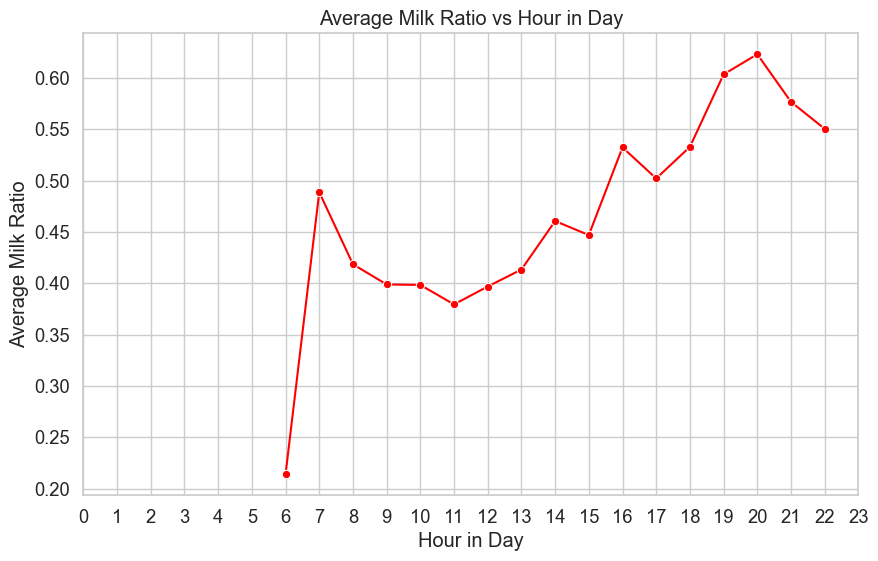

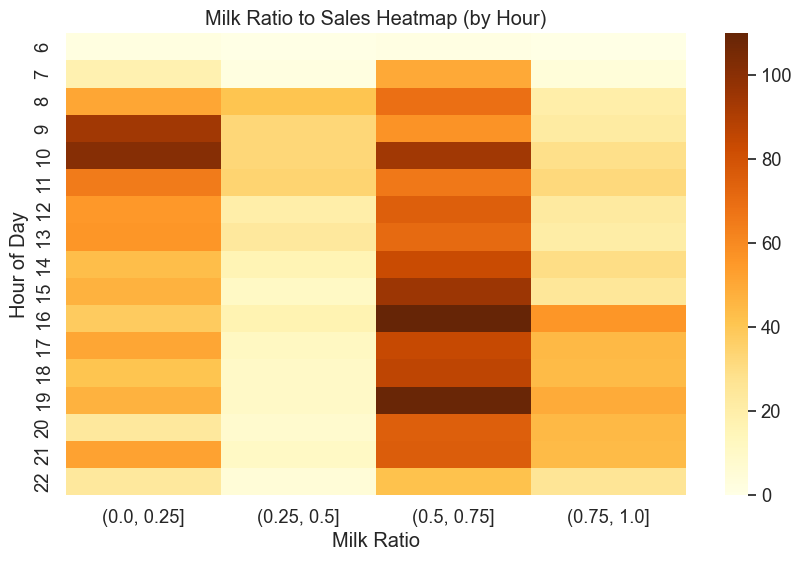

In [18]:
milk_ratio_scatter(df)
milk_ratio_heatmap(df)